In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import model
import cv2
from tqdm import tqdm
from skimage import io,transform
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

C:\Users\s110024\AppData\Local\conda\conda\envs\ML2018\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
INPUT_SIZE = [224, 224, 3]
N_CLASSES = 120
LEARNING_RATE = 2e-5
EPOCHS = 40
BATCH_SIZE = 10
LOAD_PRETRAIN = True

In [3]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [4]:
def train_eval(sess, x_data, y_label, batch_size, train_phase, is_eval,  epoch=None):
    n_sample = x_data.shape[0]
    n_batch = int((n_sample+batch_size-1) / batch_size)
    tmp_loss, tmp_acc = 0, 0
    for batch in range(n_batch):
        start = batch * batch_size
        end = min(n_sample, start + batch_size) 
        _, batch_loss, batch_acc = sess.run([train_op, loss, accuracy], 
                                            feed_dict={x: x_data[start:end], y: y_label[start:end], 
                                            is_training: train_phase})
        tmp_loss += batch_loss * (end - start)
        tmp_acc += batch_acc * (end - start)
    tmp_loss /= n_sample
    tmp_acc /= n_sample
    if train_phase:
        print('\nepoch: {0}, loss: {1:.4f}, acc: {2:.4f}'.format(epoch+1, tmp_loss, tmp_acc))
    return [tmp_loss, tmp_acc]

In [5]:
def val_eval(sess, x_data, y_label, train_phase, is_eval,  epoch=None):
    batch_size = 1
    n_sample = x_data.shape[0]
    n_batch = int((n_sample+batch_size-1) / batch_size)
    tmp_loss, tmp_acc = 0, 0
    for batch in range(n_batch):
        start = batch * batch_size
        end = min(n_sample, start + batch_size) 
        batch_loss, batch_acc = sess.run([loss, accuracy], 
                                            feed_dict={x: x_data[start:end], y: y_label[start:end], 
                                            is_training: train_phase})
        tmp_loss += batch_loss * (end - start)
        tmp_acc += batch_acc * (end - start)
    tmp_loss /= n_sample
    tmp_acc /= n_sample
    print('val_loss: {0:.4f}, val_acc: {1:.4f}'.format(tmp_loss, tmp_acc))
    
    return [tmp_loss, tmp_acc]
    

In [6]:
def test_eval(sess, x_data, train_phase):
    batch_size = 1
    n_sample = x_data.shape[0]
    n_batch = int((n_sample+batch_size-1) / batch_size)
    tmp_pred=[]
    log=[]
    for batch in range(n_batch):
        start = batch * batch_size
        end = min(n_sample, start + batch_size)
        tmp_logits = sess.run(logits, feed_dict={x: x_data[start:end], is_training: train_phase})
        tmp=softmax(np.squeeze(tmp_logits))
        tmp_pred.append(tmp)
    tmp_pred = np.array(tmp_pred)

    return tmp_pred

  0%|                                                                                        | 0/10222 [00:00<?, ?it/s]C:\Users\s110024\AppData\Local\conda\conda\envs\ML2018\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [03:44<00:00, 45.45it/s]


(10222, 224, 224, 3)


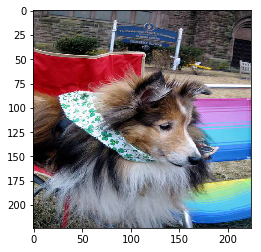

In [7]:
DATA = pd.read_csv('labels.csv').as_matrix()
All_id = DATA[:, 0]
All_breed = DATA[:, 1]
rawImg = []
All_data = []
dirs = os.getcwd()


for i in tqdm(range(0,len(All_id))):
    imgs_path = os.path.join(dirs, 'train', All_id[i]+'.jpg')
    img = io.imread(imgs_path)
    img = transform.resize(img, (224,224,3))
    All_data.append(img)

All_data = np.array(All_data)
plt.imshow(All_data[10])

print(All_data.shape)




In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print(All_breed[10])
le = LabelEncoder()
le.fit(All_breed)

breed = list(le.inverse_transform([i for i in range(0, N_CLASSES)]))
df = pd.DataFrame(breed)
df.to_csv("breed.csv", header=False, index=False)


All_encode = le.transform(All_breed)
All_encode = All_encode.reshape(-1, 1)
print(All_encode[10])

ohe = OneHotEncoder()
ohe.fit(All_encode)
All_label = ohe.transform(All_encode).toarray()
print(All_label[10])


shetland_sheepdog


C:\Users\s110024\AppData\Local\conda\conda\envs\ML2018\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[99]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
train_data, val_data, train_label, val_label = train_test_split(All_data, All_label, test_size=0)
#print(train_data.shape, train_label.shape)
#print(val_data.shape, val_label.shape)
#plt.imshow(train_data[10])

In [10]:
if __name__ == '__main__':

    x = tf.placeholder(dtype=tf.float32, shape=(None, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2]), name='x')
    y = tf.placeholder(dtype=tf.float32, shape=(None, N_CLASSES), name='y')
    is_training = tf.placeholder(dtype=tf.bool, shape=(), name='train_phase')

    logits = model.VGG16(x=x, is_training=is_training, n_classes=N_CLASSES)

    with tf.name_scope('LossLayer'):
        loss = tf.losses.softmax_cross_entropy(onehot_labels=y, logits=logits)
    with tf.name_scope('Optimizer'):
        train_op = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
        #train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    with tf.name_scope('Accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, axis=1), tf.argmax(logits, axis=1)), tf.float32))

    init = tf.global_variables_initializer()
    
    restore_variable = [var for var in tf.global_variables() if var.name.startswith('')]
    
    train_history = []
    val_history = []
    
    saver = tf.train.Saver()
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.5
    with tf.Session(config=config) as sess:
        if LOAD_PRETRAIN:
            saver.restore(sess, 'model/model.ckpt')
        else:
            sess.run(init)

        for i in range(EPOCHS):
            #if i%10 == 0:
            #    train_data, val_data, train_label, val_label = train_test_split(All_data, All_label, test_size=0.15)
            train_history.append(
                train_eval(sess=sess, x_data=train_data, y_label=train_label, batch_size=BATCH_SIZE, 
                    train_phase=True, is_eval=False, epoch=i))
            #val_history.append(
            #    val_eval(sess=sess, x_data=val_data, y_label=val_label, 
            #        train_phase=False, is_eval=False, epoch=i)
            #)
            if(i % 5 == 0 and i>20):
                saver.save(sess, r'H:\Users\sechang\model\model_{0}.ckpt'.format(i+1))
        saver.save(sess, r'H:\Users\sechang\model\final.ckpt')


INFO:tensorflow:Restoring parameters from model/model.ckpt

epoch: 1, loss: 4.8136, acc: 0.0083

epoch: 2, loss: 4.7817, acc: 0.0097

epoch: 3, loss: 4.7774, acc: 0.0119

epoch: 4, loss: 4.6646, acc: 0.0207

epoch: 5, loss: 4.5085, acc: 0.0375

epoch: 6, loss: 4.4238, acc: 0.0470

epoch: 7, loss: 4.3220, acc: 0.0629

epoch: 8, loss: 4.1560, acc: 0.0898

epoch: 9, loss: 3.9079, acc: 0.1265

epoch: 10, loss: 3.5238, acc: 0.1981

epoch: 11, loss: 3.0508, acc: 0.2829

epoch: 12, loss: 2.5626, acc: 0.3813

epoch: 13, loss: 2.0819, acc: 0.4838

epoch: 14, loss: 1.7046, acc: 0.5737

epoch: 15, loss: 1.4139, acc: 0.6364

epoch: 16, loss: 1.1603, acc: 0.6986

epoch: 17, loss: 0.9359, acc: 0.7503

epoch: 18, loss: 0.7394, acc: 0.8044

epoch: 19, loss: 0.6060, acc: 0.8349

epoch: 20, loss: 0.5061, acc: 0.8620

epoch: 21, loss: 0.4619, acc: 0.8758

epoch: 22, loss: 0.3896, acc: 0.8920

epoch: 23, loss: 0.3483, acc: 0.9074

epoch: 24, loss: 0.2868, acc: 0.9224

epoch: 25, loss: 0.2732, acc: 0.9287


In [11]:
train_history = np.array(train_history)
val_history = np.array(val_history)

In [12]:
np.save('./history/train_history.npy', train_history)
np.save('./history/val_history.npy', val_history)